**Registro Clínicos de insuficiência cardiáca**



*  data set contém um conjunto de características 

  que podem ser usadas para prever a mortalidade por

  insuficiência cardíaca.


link dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data






importndo algumas das principais biblioteca como pandas e matplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Atribuir a uma variável o dataset escolhido

In [ ]:
dataFrame = pd.read_csv('/content/drive/My Drive/heart_failure_clinical.csv')

Com o método head() é possível ver as promeiras linha dos dataframe, por padrão ele exibe as primeiras 5 linhas

In [ ]:
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Podemos usar o describe() e info() para retornar um resumo estatístico das variáveis númericas e obter um resumo de valores não-nulos encontrados respectivamente.

In [ ]:
dataFrame.describe()
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Usando a combinação de aalguns métodos como o isnull().sum() podemos ver a soma dos valores nulos encontrados. Podemos ver um alto número de dados faltantes em alguns atributos

In [ ]:
dataFrame.isnull().sum().sort_values(ascending=False)[:10]

DEATH_EVENT            0
time                   0
smoking                0
sex                    0
serum_sodium           0
serum_creatinine       0
platelets              0
high_blood_pressure    0
ejection_fraction      0
diabetes               0
dtype: int64

Verifica se existem valores NAN, ? ou dados faltantes

In [ ]:
dataFrame = dataFrame.dropna()

Re-escala usando máxino e mínimo

In [ ]:
dataFrame = (dataFrame - dataFrame.min())/(dataFrame.max()-dataFrame.min())
dataFrame.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


##Analise de correlação

* Correlação exprime o grau de relação entre duas variáveis

* Os dados podem ser representados por pares ordenados (x,y), onde $x$ é a variável independente ou explanatória e $y$ é a variável dependente ou resposta

In [ ]:
idade = dataFrame.age
bomb = dataFrame.ejection_fraction

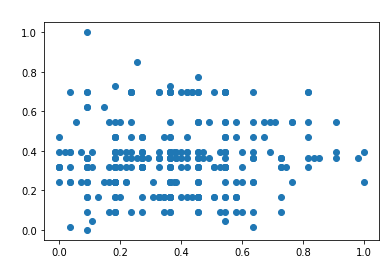

In [ ]:
plt.scatter(idade, bomb)
plt.xlabel('IDADE', color='white' )
plt.ylabel('Sangue Bombeado', color='white' )
plt.title('Diagrama de Dispersão', color='white' )
plt.show()

Podemos ver que a correlação das variáveis são bem dispersas sem uma correlação positiva ou negativa bem definida

In [ ]:
creatina = dataFrame.serum_creatinine

sodio = dataFrame.serum_sodium

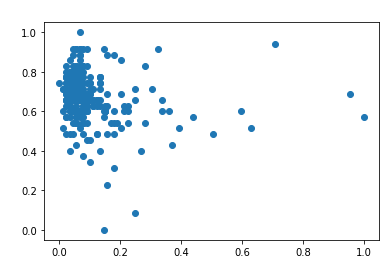

In [ ]:
plt.scatter(creatina, sodio)
plt.xlabel('Creatina', color='white' )
plt.ylabel('Sodio', color='white' )
plt.title('Diagrama de Dispersão', color='white' )
plt.show()

Aqui já temos uma correlação um pouco negativa, porém ainda não é possível identificar de forma precisa a coreelação entre os doi dados

##coeficiente de Correlação

* O coeficiente de correlação é uma medida de forma e direção de uma relação linear entre duas variáveis

 * A amplitude do coeficiente de correlação é $-1$ para 1
  * Se $x$ e $y$ têm uma correlação linear positiva forte, $\rho$ está próximo de 1
  * Se $x$ e $y$ têm uma correlação linear negativa forte, $\rho$ está próximo de $-1$
  * Se a correlação linear entre $x$ e $y$ é fraca ou inexistente, $\rho$ está próximo de 0



In [ ]:
import numpy as np

np.corrcoef(idade, bomb)

array([[1.        , 0.06009836],
       [0.06009836, 1.        ]])

In [ ]:
np.corrcoef(creatina, sodio)

array([[ 1.        , -0.18909521],
       [-0.18909521,  1.        ]])

Para tentar identificar de forma mais clara podemos utilizar o coeficiẽnte de correlação, chegando a conclusão que ambas comparações tem uma baixa correlação entre elas.

##Regressão Linear

* Após verificar se a correlação linear entre duas variáveis é significante, o próximo passo é determinar a equação da linha que melhor modela os dados

In [ ]:
from scipy import stats

creatina = dataFrame.serum_creatinine
sodio = dataFrame.serum_sodium

m, b, r_value, p_value, std_err = stats.linregress(creatina, sodio)
m, b

(-0.20509272379484286, 0.6956106189180915)

In [ ]:
#Calculando a linha de Regressão

linha_reg = [m*i+b for i in range(int(max(creatina))+1)]

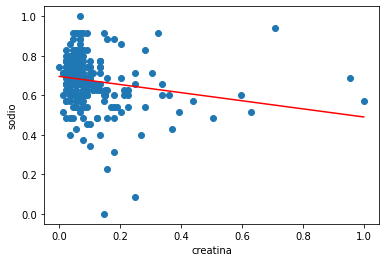

In [ ]:
#Diagrama de disperssão entre creatina e sodio
plt.scatter(creatina, sodio)
plt.plot(linha_reg, 'r')
plt.xlabel('creatina')
plt.ylabel('sodio')
plt.show()

Temos aplicando a regressão linear uma linha que mostra uma correlação negativa fraca entre os dados

In [ ]:
from scipy import stats

idade = dataFrame.age
bomb = dataFrame.ejection_fraction

m, b, r_value, p_value, std_err = stats.linregress(idade, bomb)
m, b

(0.049829478362587415, 0.34602790328774724)

In [ ]:
linha_reg = [m*i+b for i in range(int(max(idade))+1)]

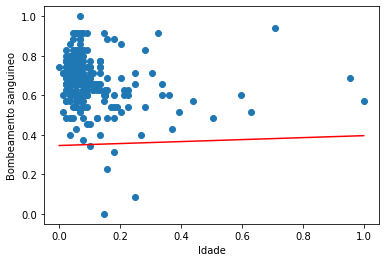

In [ ]:
plt.scatter(creatina, sodio)
plt.plot(linha_reg, 'r')
plt.xlabel('Idade')
plt.ylabel('Bombeamento sanguineo')
plt.show()

Também podemos ver de forma visual aplicando a regressão linear uma linha que mostra uma correlação positiva fraca entre os dados